Classification Task:

Decide about a good evaluation strategy and justify your choice. Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. Which model gives the best results?

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

array([[<AxesSubplot:title={'center':'889'}>,
        <AxesSubplot:title={'center':'939'}>,
        <AxesSubplot:title={'center':'960'}>,
        <AxesSubplot:title={'center':'805'}>,
        <AxesSubplot:title={'center':'805.1'}>,
        <AxesSubplot:title={'center':'1143'}>,
        <AxesSubplot:title={'center':'1121'}>,
        <AxesSubplot:title={'center':'549'}>,
        <AxesSubplot:title={'center':'613'}>],
       [<AxesSubplot:title={'center':'587'}>,
        <AxesSubplot:title={'center':'447'}>,
        <AxesSubplot:title={'center':'406'}>,
        <AxesSubplot:title={'center':'696'}>,
        <AxesSubplot:title={'center':'612'}>,
        <AxesSubplot:title={'center':'0.000730'}>,
        <AxesSubplot:title={'center':'0.000777'}>,
        <AxesSubplot:title={'center':'0.000757'}>,
        <AxesSubplot:title={'center':'0.000625'}>],
       [<AxesSubplot:title={'center':'0.000588'}>,
        <AxesSubplot:title={'center':'0.000905'}>,
        <AxesSubplot:title={'center':'0.0008

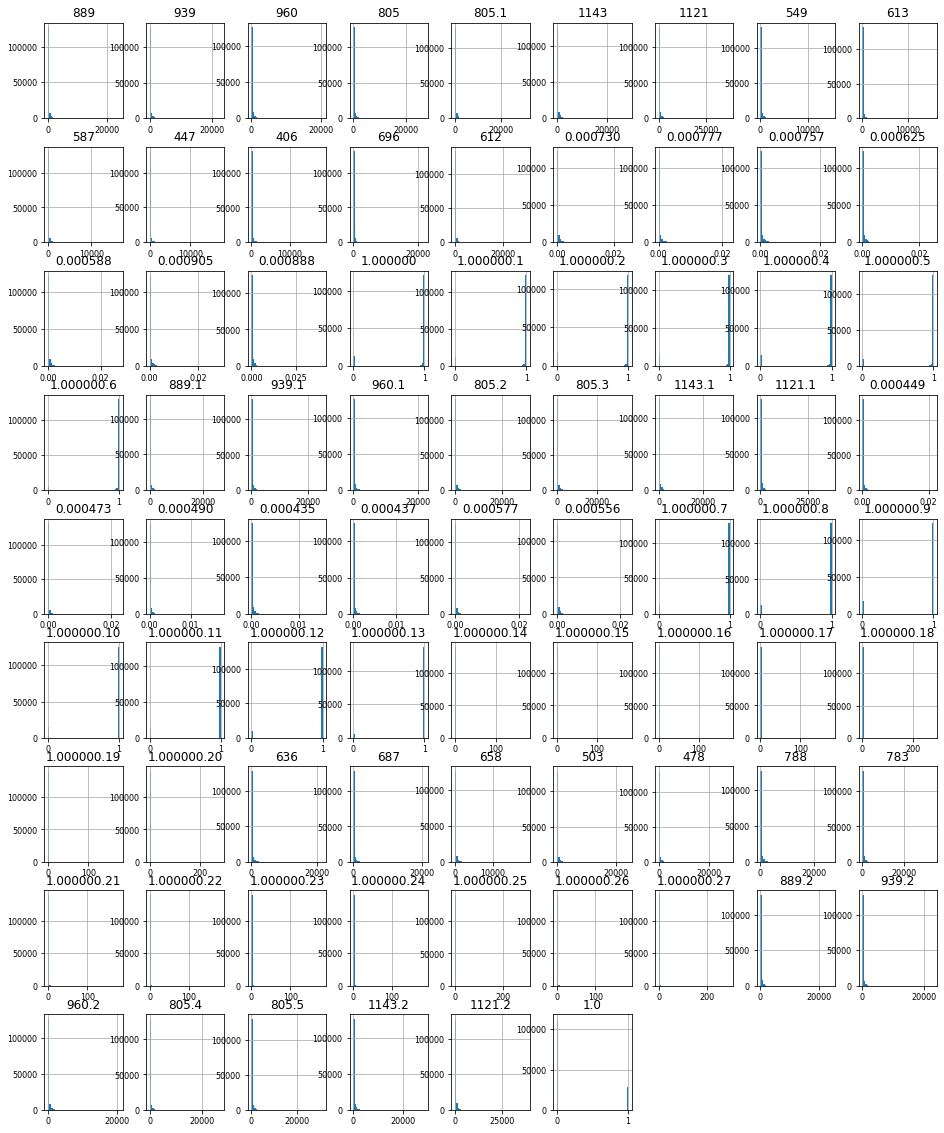

In [41]:
import zipfile

with zipfile.ZipFile("twitter.zip","r") as zip_ref:
    zip_ref.extractall(".")
Twitter_Absolute_Sigma = pd.read_table('Twitter-Absolute-Sigma-500.csv',sep=",")
Twitter_Absolute_Sigma.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [42]:
Twitter_Absolute_Sigma.columns= ["NCD_0", "NCD_1", "NCD_2", "NCD_3", "NCD_4", "NCD_5", "NCD_6", "AI_0", "AI_1", "AI_2", "AI_3", "AI_4", "AI_5", "AI_6", "AS_NA_0", "AS_NA_1", "AS_NA_2", "AS_NA_3", "AS_NA_4", "AS_NA_5", "AS_NA_6", "BL_0", "BL_1", "BL_2", "BL_3", "BL_4", "BL_5", "BL_6", "NAC_0", "NAC_1", "NAC_2", "NAC_3", "NAC_4", "NAC_5", "NAC_6", "AS_NAC_0", "AS_NAC_1", "AS_NAC_2", "AS_NAC_3", "AS_NAC_4", "AS_NAC_5", "AS_NAC_6", "CS_0", "CS_1", "CS_2", "CS_3", "CS_4", "CS_5", "CS_6", "AT_0", "AT_1", "AT_2", "AT_3", "AT_4", "AT_5", "AT_6", "NA_0", "NA_1", "NA_2", "NA_3", "NA_4", "NA_5", "NA_6", "ADL_0", "ADL_1", "ADL_2", "ADL_3", "ADL_4", "ADL_5", "ADL_6", "NAD_0", "NAD_1", "NAD_2", "NAD_3", "NAD_4", "NAD_5", "NAD_6", "buzz"]

In [43]:
Twitter_Absolute_Sigma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140706 entries, 0 to 140705
Data columns (total 78 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NCD_0     140706 non-null  int64  
 1   NCD_1     140706 non-null  int64  
 2   NCD_2     140706 non-null  int64  
 3   NCD_3     140706 non-null  int64  
 4   NCD_4     140706 non-null  int64  
 5   NCD_5     140706 non-null  int64  
 6   NCD_6     140706 non-null  int64  
 7   AI_0      140706 non-null  int64  
 8   AI_1      140706 non-null  int64  
 9   AI_2      140706 non-null  int64  
 10  AI_3      140706 non-null  int64  
 11  AI_4      140706 non-null  int64  
 12  AI_5      140706 non-null  int64  
 13  AI_6      140706 non-null  int64  
 14  AS_NA_0   140706 non-null  float64
 15  AS_NA_1   140706 non-null  float64
 16  AS_NA_2   140706 non-null  float64
 17  AS_NA_3   140706 non-null  float64
 18  AS_NA_4   140706 non-null  float64
 19  AS_NA_5   140706 non-null  float64
 20  AS_N

<class 'pandas.core.frame.DataFrame'>
46
Anterior (140706, 78), nuevo (140706, 32)


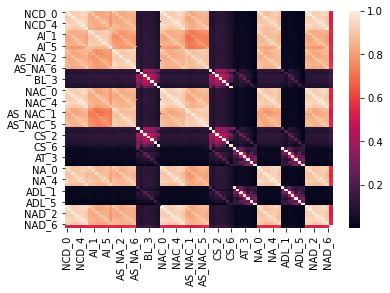

In [44]:
# método de curado para columnas correlacionadas
# obtenido de https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/ 
# pero adaptado por nosotros
import seaborn as sb
matriz_corr = Twitter_Absolute_Sigma.corr().abs()
print(type(matriz_corr))
sb.heatmap(matriz_corr)
upper = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))
la_borracion = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(la_borracion))
twitter_nuevo = Twitter_Absolute_Sigma.drop(Twitter_Absolute_Sigma[la_borracion], axis = 1)
print("Anterior {}, nuevo {}".format(Twitter_Absolute_Sigma.shape, twitter_nuevo.shape))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

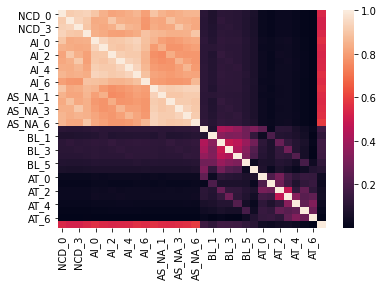

In [45]:
matriz_corr2 = twitter_nuevo.corr().abs()
print(type(matriz_corr2))
sb.heatmap(matriz_corr2)

In [46]:

correlacion = twitter_nuevo.corr()['buzz'][:-1]
#print(correlacion)
print("El tipo del objecto correlacion es {}".format(type(correlacion)))
golden_features_list = correlacion[abs(correlacion) > 0.5].sort_values(ascending=False)
print("Exista una alta correlación entre buzz y la(s) {} variable(s) que imprimimos a continuación :\n{}".format(len(golden_features_list), golden_features_list))


El tipo del objecto correlacion es <class 'pandas.core.series.Series'>
Exista una alta correlación entre buzz y la(s) 17 variable(s) que imprimimos a continuación :
AS_NA_6    0.590685
AS_NA_0    0.569936
AI_0       0.563503
AI_5       0.563072
AS_NA_4    0.562929
AS_NA_3    0.557119
AI_6       0.552311
AS_NA_1    0.551447
AS_NA_2    0.547838
AI_4       0.546427
AI_1       0.545227
NCD_0      0.540727
NCD_6      0.540694
AI_3       0.540559
AI_2       0.537591
NCD_3      0.526567
NCD_2      0.525923
Name: buzz, dtype: float64


In [47]:
#Transforming the predicted buzz column to integer
twitter_nuevo['buzz'] = twitter_nuevo['buzz'].map( {1.0: 1, 0.0: 0} ).astype(int)

In [48]:
twitter_2 = twitter_nuevo[["AS_NA_6", "AS_NA_0", "AI_0", "AI_5", "AS_NA_4", "AS_NA_3", "AI_6", "AS_NA_1", "AS_NA_2",
              "AI_4", "AI_1", "NCD_0", "NCD_6", "AI_3", "AI_2", "NCD_3", "NCD_2", "buzz"]]
X = twitter_2
X.drop(["buzz"], axis = 1)
X

AS_NA_6   AS_NA_0  AI_0  AI_5   AS_NA_4   AS_NA_3  AI_6   AS_NA_1  \
0       0.000729  0.000517   366   519  0.000647  0.000614   545  0.000460   
1       0.000496  0.000234    66    65  0.000618  0.000264   113  0.000249   
2       0.000548  0.000339    83   696  0.000538  0.001074   159  0.000294   
3       0.000582  0.000498   141    82  0.000289  0.000295   160  0.000286   
4       0.001120  0.000803   614   776  0.000863  0.000800   828  0.000777   
...          ...       ...   ...   ...       ...       ...   ...       ...   
140701  0.001527  0.001484   697   798  0.001477  0.001317   674  0.001366   
140702  0.002188  0.002044   493   401  0.002211  0.001098   473  0.002570   
140703  0.002562  0.001745   403   586  0.002614  0.002299   573  0.001964   
140704  0.003863  0.002285   487   582  0.002691  0.003014   947  0.002448   
140705  0.002839  0.002618   618   624  0.002490  0.002593   748  0.002212   

         AS_NA_2  AI_4  AI_1  NCD_0  NCD_6  AI_3  AI_2  NCD_3  NCD_2  buzz  
0       0.000474   463   288    542    832   445   318    626    504     1  
1       0.000490   131    59     92    162    58   118    100    196     0  
2       0.000320   155    78     90    184   288    76    344     92     1  
3       0.000304    79    68    169    185    73    85     90    101     1  
4       0.000929   697   588    775   1198   643   751    806    935     1  
...          ...   ...   ...    ...    ...   ...   ...    ...    ...   ...  
140701  0.001358   622   579   1700   1736   569   501   1437   1364     1  
140702  0.002642   487   527   1280   1353    19   293     66    758     1  
140703  0.002146   517   480   1128   1490   505   486   1250   1273     1  
140704  0.003344   586   506   1228   2582   663   752   1789   1999     1  
140705  0.000000   609   610   1689   1688   681     0   1721      0     1  

[140706 rows x 18 columns]

In [49]:
X= X.drop(['buzz'], axis = 1)
y = twitter_2['buzz']
X

AS_NA_6   AS_NA_0  AI_0  AI_5   AS_NA_4   AS_NA_3  AI_6   AS_NA_1  \
0       0.000729  0.000517   366   519  0.000647  0.000614   545  0.000460   
1       0.000496  0.000234    66    65  0.000618  0.000264   113  0.000249   
2       0.000548  0.000339    83   696  0.000538  0.001074   159  0.000294   
3       0.000582  0.000498   141    82  0.000289  0.000295   160  0.000286   
4       0.001120  0.000803   614   776  0.000863  0.000800   828  0.000777   
...          ...       ...   ...   ...       ...       ...   ...       ...   
140701  0.001527  0.001484   697   798  0.001477  0.001317   674  0.001366   
140702  0.002188  0.002044   493   401  0.002211  0.001098   473  0.002570   
140703  0.002562  0.001745   403   586  0.002614  0.002299   573  0.001964   
140704  0.003863  0.002285   487   582  0.002691  0.003014   947  0.002448   
140705  0.002839  0.002618   618   624  0.002490  0.002593   748  0.002212   

         AS_NA_2  AI_4  AI_1  NCD_0  NCD_6  AI_3  AI_2  NCD_3  NCD_2  
0       0.000474   463   288    542    832   445   318    626    504  
1       0.000490   131    59     92    162    58   118    100    196  
2       0.000320   155    78     90    184   288    76    344     92  
3       0.000304    79    68    169    185    73    85     90    101  
4       0.000929   697   588    775   1198   643   751    806    935  
...          ...   ...   ...    ...    ...   ...   ...    ...    ...  
140701  0.001358   622   579   1700   1736   569   501   1437   1364  
140702  0.002642   487   527   1280   1353    19   293     66    758  
140703  0.002146   517   480   1128   1490   505   486   1250   1273  
140704  0.003344   586   506   1228   2582   663   752   1789   1999  
140705  0.000000   609   610   1689   1688   681     0   1721      0  

[140706 rows x 17 columns]

In [50]:
#!pip3 install imblearn

#!{sys.executable} -m pip install imblearn
#!{sys.executable} -m pip install Counter

from imblearn.under_sampling import RandomUnderSampler
#import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', len(y))
print('Resample dataset shape', len(y_rus))

original dataset shape: 140706
Resample dataset shape 55548


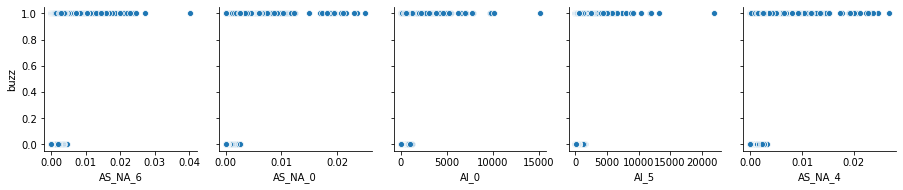

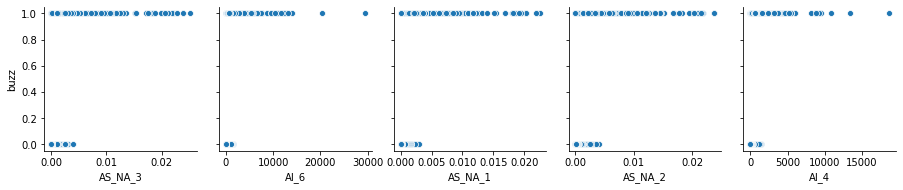

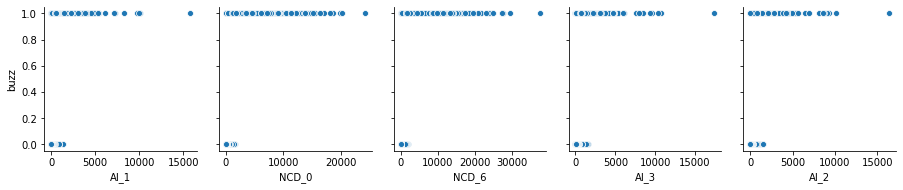

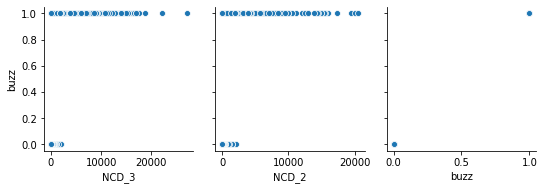

In [51]:
#https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

for i in range(0, len(twitter_2.columns), 5):
    sb.pairplot(data=twitter_2,
                x_vars=twitter_2.columns[i:i+5],
                y_vars=['buzz'])

In [52]:
#y.sum()/y.count()
# 0.1974 sin aplicar técnica SMOTE para los conjuntos altamente imbalanceados.
print(y.sum()/y.count())
print(type(y_rus))
y_rus.sum()/y_rus.count()

0.19739030318536524
<class 'pandas.core.series.Series'>


0.5

In [53]:
#
# 0.82 sin balancear
print(max(y.mean(), 1 - y.mean()))
max(y_rus.mean(), 1 - y_rus.mean())

0.8026096968146348


0.5

Bases on the null accuracy and y.sum()/y.count() we see that the dataset is not balanced. AUC is to be used when evaluating models on imbalanced data. 
Hence for this project we consider AUC as a scoring function.

In [54]:
Dummytrain,sample_data,Dummytrain2,sample_target = train_test_split(x_rus, y_rus, shuffle = True, test_size = 0.25)
X = sample_data
y = sample_target
X

AS_NA_6   AS_NA_0  AI_0  AI_5   AS_NA_4   AS_NA_3  AI_6   AS_NA_1  \
24422  0.000218  0.000102    82    94  0.000101  0.000079   178  0.000102   
45402  0.001386  0.000991   279   507  0.000882  0.001008   478  0.001034   
14116  0.000099  0.000049    37    46  0.000046  0.000073    78  0.000062   
20392  0.000022  0.000017     4     5  0.000014  0.000021     4  0.000015   
22109  0.000001  0.000001     1     1  0.000000  0.000000     1  0.000000   
...         ...       ...   ...   ...       ...       ...   ...       ...   
17474  0.000010  0.000000     0     0  0.000007  0.000002     0  0.000007   
15220  0.000051  0.000037    31    68  0.000070  0.000093    44  0.000039   
50530  0.000704  0.000474   267   438  0.000455  0.000437   429  0.000395   
48074  0.000699  0.000603   175   210  0.000644  0.000801   169  0.000377   
36877  0.000879  0.000823   425   476  0.000874  0.000710   420  0.001001   

        AS_NA_2  AI_4  AI_1  NCD_0  NCD_6  AI_3  AI_2  NCD_3  NCD_2  
24422  0.000084    81    74     91    202    53    54     76     74  
45402  0.001019   221   282    608    628   241   281    666    576  
14116  0.000044    35    46     44     92    62    34     64     43  
20392  0.000023     2     3      5      8     6     5      9      8  
22109  0.000000     0     0      1      1     0     0      0      0  
...         ...   ...   ...    ...    ...   ...   ...    ...    ...  
17474  0.000005     4     2      0      5     0     0      1      3  
15220  0.000176    63    30     34     52    86   160     84     52  
50530  0.000382   253   247    429    739   221   220    376    339  
48074  0.000353   202    93    369    442   287   114    489    204  
36877  0.000689   371   508    885    985   332   335    772    742  

[13887 rows x 17 columns]

In [55]:
#X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_org, X_test_org, y_train, y_test = train_test_split(x_rus, y_rus, random_state=0)

In [68]:
#We choose the MinMaxScaler to scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#X_full_scaled = scaler.fit_transform(X)
#X_full_scaled

array([[0.00915736, 0.00520621, 0.00806293, ..., 0.00535396, 0.0040766 ,
        0.00426956],
       [0.05822062, 0.05058187, 0.02743363, ..., 0.0278604 , 0.03572386,
        0.03323333],
       [0.00415862, 0.00250102, 0.00363815, ..., 0.00337101, 0.00343292,
        0.00248096],
       ...,
       [0.02957238, 0.02419355, 0.02625369, ..., 0.02181241, 0.02016843,
        0.0195592 ],
       [0.02936235, 0.03077787, 0.01720747, ..., 0.0113028 , 0.02622968,
        0.01177014],
       [0.03692346, 0.04200694, 0.04178958, ..., 0.03321436, 0.04140964,
        0.04281099]])

In [73]:
df_train = pd.DataFrame(data = X_train, columns = ["AS_NA_6", "AS_NA_0", "AI_0", "AI_5", "AS_NA_4", "AS_NA_3", "AI_6", "AS_NA_1", "AS_NA_2",
              "AI_4", "AI_1", "NCD_0", "NCD_6", "AI_3", "AI_2", "NCD_3", "NCD_2"])
df_train['ybuzz'] = y_train.values

In [74]:
# https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
from scipy.stats import zscore
# z centrado para remover outliers
z_scores = zscore(df_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

new_df = df_train[filtered_entries]
print(df_train.count(), new_df.count())

AS_NA_6    41661
AS_NA_0    41661
AI_0       41661
AI_5       41661
AS_NA_4    41661
AS_NA_3    41661
AI_6       41661
AS_NA_1    41661
AS_NA_2    41661
AI_4       41661
AI_1       41661
NCD_0      41661
NCD_6      41661
AI_3       41661
AI_2       41661
NCD_3      41661
NCD_2      41661
ybuzz      41661
dtype: int64 AS_NA_6    39851
AS_NA_0    39851
AI_0       39851
AI_5       39851
AS_NA_4    39851
AS_NA_3    39851
AI_6       39851
AS_NA_1    39851
AS_NA_2    39851
AI_4       39851
AI_1       39851
NCD_0      39851
NCD_6      39851
AI_3       39851
AI_2       39851
NCD_3      39851
NCD_2      39851
ybuzz      39851
dtype: int64


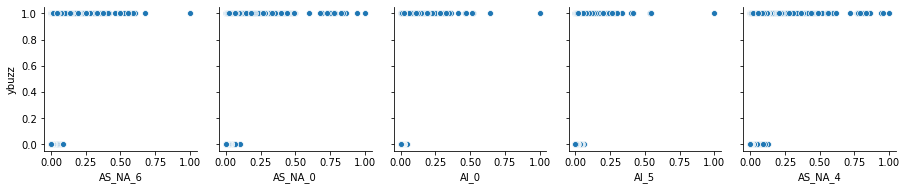

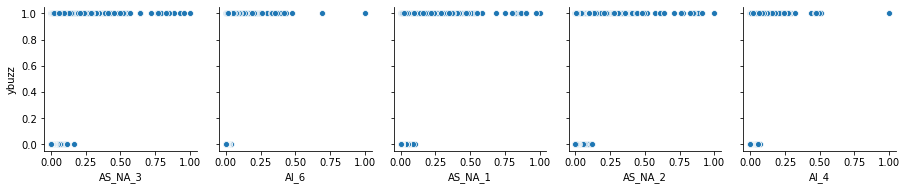

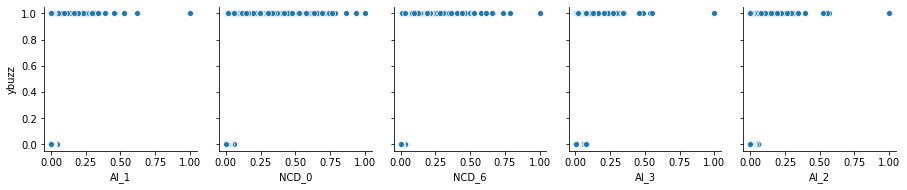

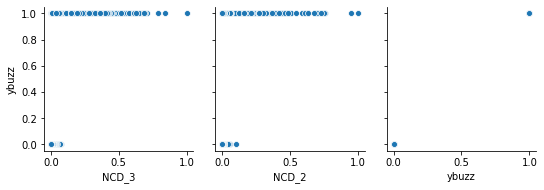

In [76]:
#df_train['ybuzz'] = y_train.values
#for i in range(0, len(df_train.columns), 5):
#    sb.pairplot(data=df_train,
#                x_vars=df_train.columns[i:i+5],
#                y_vars=['ybuzz'])
for i in range(0, len(new_df.columns), 5):
    sb.pairplot(data=df_train,
                x_vars=new_df.columns[i:i+5],
                y_vars=['ybuzz'])

In [77]:
print(new_df.ybuzz.shape)
np.sum(new_df.ybuzz[new_df.ybuzz == 1])#correlacion[abs(correlacion) > 0.5].sort_values(ascending=False)

(39851,)


18991

In [78]:
new_df.ybuzz.count()


new_y_train = new_df.ybuzz
new_x_train = new_df.drop(["ybuzz"], axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression as lr

classifier = lr()

C = [0, 3, 7, 13, 17, 21, 32 , 45, 56, 10]
penalty = ['l1', 'l2', 'None']
solver = ['saga', 'lbfgs']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

clf1 = RandomizedSearchCV(classifier, hyperparameters, n_iter=30, cv=5, scoring='accuracy')

best_model1 = clf1.fit(new_x_train,np.array(new_y_train).reshape(new_y_train.shape[0],1))

In [ ]:
pred1 = np.array(best_model1.predict(X_test))

recall_lr = rs(y_test,pred1)
precision_lr = ps(y_test,pred1)
f1_lr = fs(y_test,pred1)
ma_lr = clf1.score(X_test,y_test)

print('*** Evaluation ***\n')

# Mejores hyperparametros
print('Best C:          ', best_model1.best_estimator_.get_params()['C'])
print('Best Penalty:    ', best_model1.best_estimator_.get_params()['penalty'])
print('Best Solver:     ', best_model1.best_estimator_.get_params()['solver'])

# Metricas
print('Recall Score:    ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score:        ',f1_lr)
print('Accuracy:        ',ma_lr)
a = pd.DataFrame(y_test)
a['pred']= clf1.predict(X_test)
print('\n\tDeath vs Pred')
print(a.head())

matriz = cm(y_test,pred1)


In [ ]:
from sklearn import svm
classifier = svm.SVC()

#kernel = ['linear', 'poly', 'rbf', 'sigmoid']
kernel = ['linear']
degree = [3, 7, 13, 17, 21, 32]
gamma  = ['scale','auto']

hyperparameters = dict(kernel=kernel, degree=degree, gamma=gamma)

clf3 = RandomizedSearchCV(classifier, hyperparameters, n_iter=100, cv=5, scoring='accuracy')

best_model3 = clf3.fit(new_x_train,np.array(new_y_train).reshape(new_y_train.shape[0],1))

In [ ]:
pred3 = np.array(best_model3.predict(X_test))

recall_svm = rs(y_test,pred3)
precision_svm = ps(y_test,pred3)
f1_svm = fs(y_test,pred3)
ma_svm = clf3.score(X_test,y_test)

print('*** Evaluation ***\n')
# Mejores hyperparametros
print('Best kernel:     ', best_model3.best_estimator_.get_params()['kernel'])
print('Best degree:     ', best_model3.best_estimator_.get_params()['degree'])
print('Best gamma:      ', best_model3.best_estimator_.get_params()['gamma'])

# Metricas
print('Recall Score:    ', recall_svm)
print('Precision Score: ', precision_svm)
print('F1 Score:        ', f1_svm)
print('Accuracy:        ', ma_svm)
a = pd.DataFrame(y_test)
a['pred']= clf3.predict(X_test)
print('\n\tDeath vs Pred')
print(a.head())

matriz = cm(y_test,pred3)
sb.heatmap(matriz, annot=True)

In [ ]:
#cambio